<a href="https://colab.research.google.com/github/ambarish-S-04/Cyber-Security-Course-Project/blob/main/CS_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, clear_output


global_img = None
global_filename = None


def upload_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        img = Image.open(filename)
        return img, filename
    return None, None


upload_button = widgets.Button(description="Upload Image")
output = widgets.Output()

def on_button_click(b):
    global global_img, global_filename
    with output:
        clear_output()
        print("Upload an image for encryption/decryption")
        img, filename = upload_image()
        if img is not None:
            global_img = img
            global_filename = filename
            plt.figure(figsize=(6,6))
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis('off')
            plt.show()
        else:
            print("No image uploaded")

upload_button.on_click(on_button_click)
display(upload_button, output)

Button(description='Upload Image', style=ButtonStyle())

Output()

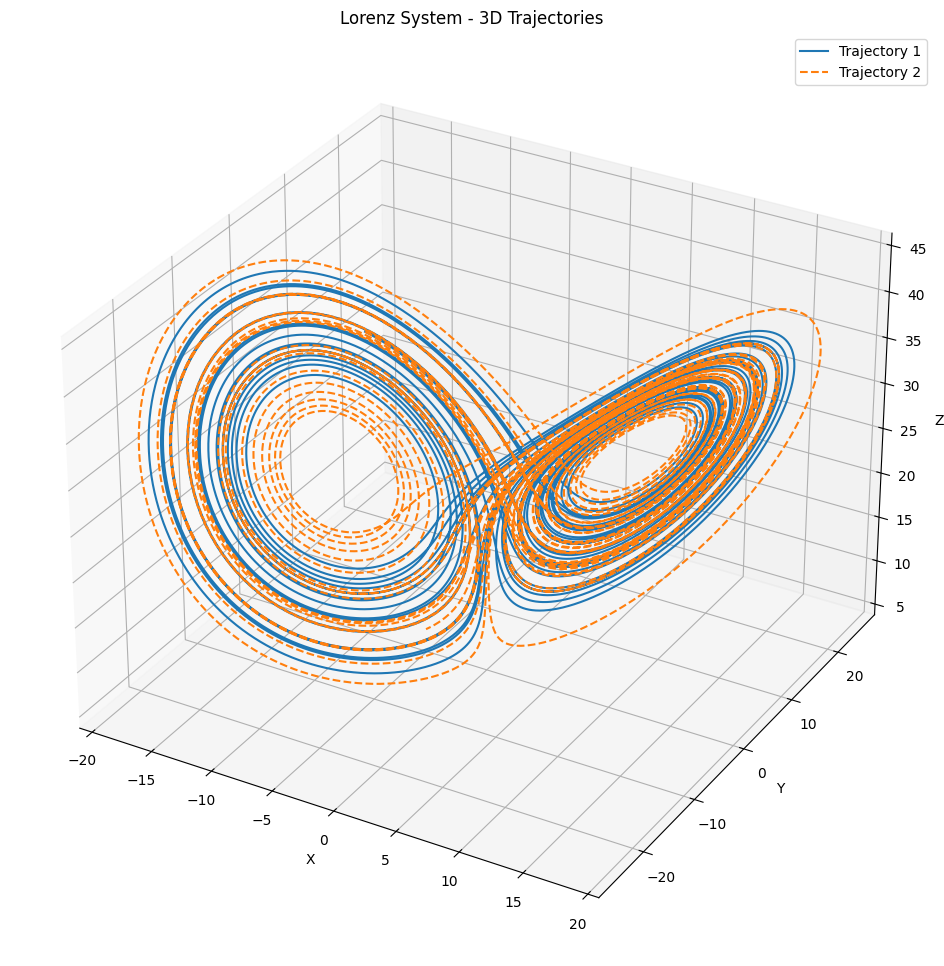

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz(t, x):
    return np.array([10*(x[1]-x[0]), 28*x[0]-x[1]-x[0]*x[2], x[0]*x[1]-(8/3)*x[2]])

def RK4(f, x0, t0, tf, N):
    t = np.linspace(t0, tf, N)
    dt = t[1] - t[0]
    x = np.zeros((len(x0), N))
    x[:, 0] = x0
    for i in range(1, N):
        k1 = f(t[i-1], x[:, i-1])
        k2 = f(t[i-1] + dt/2, x[:, i-1] + dt/2 * k1)
        k3 = f(t[i-1] + dt/2, x[:, i-1] + dt/2 * k2)
        k4 = f(t[i-1] + dt, x[:, i-1] + dt * k3)
        x[:, i] = x[:, i-1] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    return t, x

x0 = np.array([-10.058, 0.368, 37.368])
x1 = np.array([-10.058, 0.368, 37.3680001])


t, x = RK4(lorenz, x0, 0, 40, 50625)
t1, x1 = RK4(lorenz, x1, 0, 40, 50625)


fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.plot(x[0], x[1], x[2], label='Trajectory 1')
ax.plot(x1[0], x1[1], x1[2], label='Trajectory 2', linestyle='--')
ax.set_title('Lorenz System - 3D Trajectories')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()


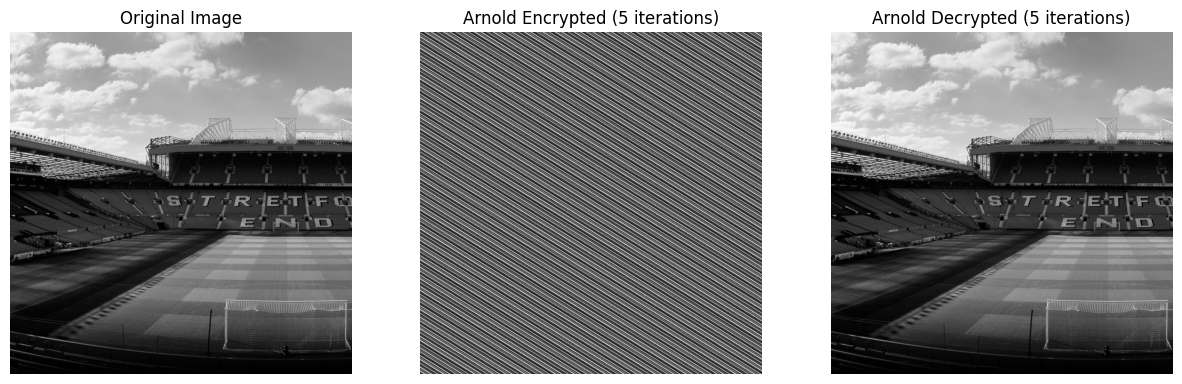

In [ ]:
def preprocess_image(img):
    img = img.convert('L')
    width, height = img.size
    N = min(width, height)
    img = img.crop((0, 0, N, N))
    return img

def arnold_cat_map_encrypt(img, iterations=5):
    img = preprocess_image(img)
    arr = np.array(img, dtype=np.uint8)
    N = arr.shape[0]
    encrypted = np.zeros_like(arr)

    for _ in range(iterations):
        for i in range(N):
            for j in range(N):
                new_i = (i + j) % N
                new_j = (i + 2 * j) % N
                encrypted[new_i, new_j] = arr[i, j]
        arr = encrypted.copy()
    return Image.fromarray(encrypted)

def arnold_cat_map_decrypt(img, iterations=5):
    img = img.convert('L')
    arr = np.array(img)
    N = arr.shape[0]
    decrypted = np.zeros_like(arr)

    for _ in range(iterations):
        for i in range(N):
            for j in range(N):
                new_i = (2 * i - j) % N
                new_j = (-i + j) % N
                decrypted[new_i, new_j] = arr[i, j]
        arr = decrypted.copy()
    return Image.fromarray(decrypted)


if global_img is not None:
    global_img = preprocess_image(global_img)


    encrypted_cat = arnold_cat_map_encrypt(global_img, iterations=5)


    decrypted_cat = arnold_cat_map_decrypt(encrypted_cat, iterations=5)


    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(global_img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(encrypted_cat, cmap='gray')
    plt.title("Arnold Encrypted (5 iterations)")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(decrypted_cat, cmap='gray')
    plt.title("Arnold Decrypted (5 iterations)")
    plt.axis('off')

    plt.show()
else:
    print("Please upload an image first (run Cell 1 and click the upload button).")

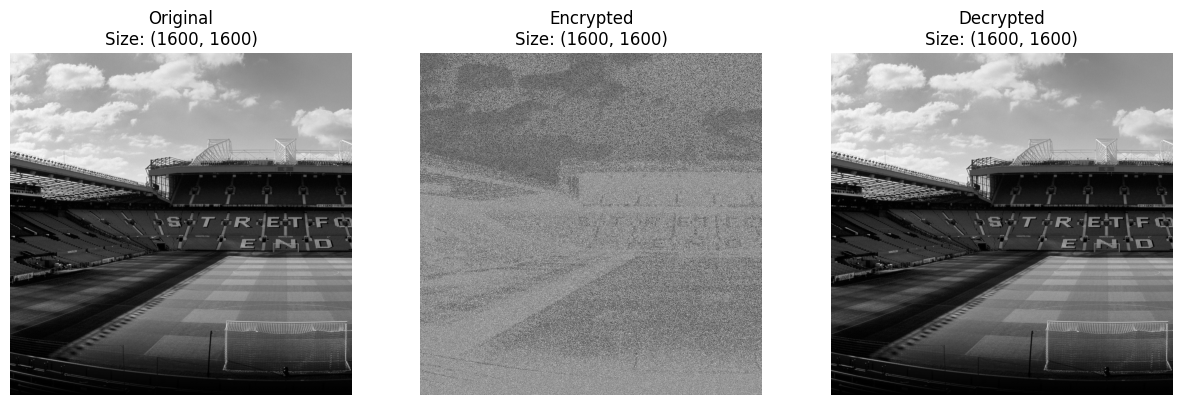

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def logistic_map(x, r, iterations):
    """Generate chaotic sequence using Logistic Map"""
    sequence = []
    for _ in range(iterations):
        x = r * x * (1 - x)
        sequence.append(x)
    return sequence


def logistic_encrypt(img, key, r=3.9):
    """Encrypt image without cropping using correct sequence reshaping"""
    img = img.convert('L')
    arr = np.array(img)
    h, w = arr.shape


    sequence = logistic_map(key, r, h * w)
    seq = (np.array(sequence) * 255).astype(np.uint8)

    seq = seq[:h * w].reshape(h, w)


    encrypted = np.bitwise_xor(arr, seq)
    return Image.fromarray(encrypted)

if 'global_img' in globals() and global_img is not None:
    encrypted = logistic_encrypt(global_img, key=0.5)
    decrypted = logistic_encrypt(encrypted, key=0.5)


    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(global_img, cmap='gray')
    plt.title(f"Original\nSize: {global_img.size}")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(encrypted, cmap='gray')
    plt.title(f"Encrypted\nSize: {encrypted.size}")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(decrypted, cmap='gray')
    plt.title(f"Decrypted\nSize: {decrypted.size}")
    plt.axis('off')

    plt.show()
else:
    print("Please upload an image in Cell 1 first!")

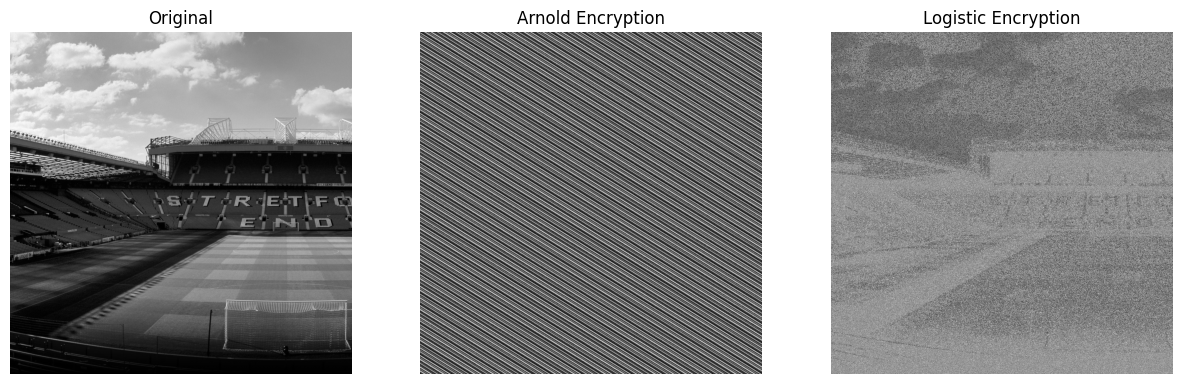

In [ ]:

if global_img is not None:
    arnold_enc = arnold_cat_map_encrypt(global_img, 5)

    logistic_enc = logistic_encrypt(global_img, 0.5)

    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(global_img, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(arnold_enc, cmap='gray')
    plt.title("Arnold Encryption")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(logistic_enc, cmap='gray')
    plt.title("Logistic Encryption")
    plt.axis('off')

    plt.show()

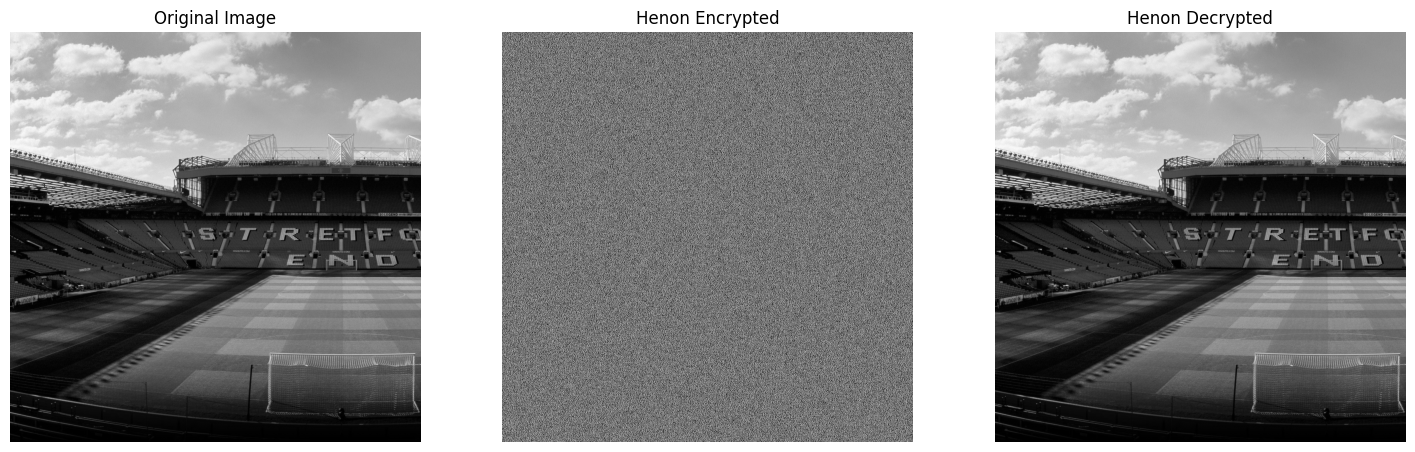

⚠️ Warning: Small rounding errors detected
Mismatched pixels: 2547059


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def generate_henon_sequence(h, w, x0=0.1, y0=0.1, a=1.4, b=0.3):
    """Generates reproducible chaotic pixel mapping"""
    sequence = []
    x, y = x0, y0
    for _ in range(h * w):
        x_new = 1 - a * x**2 + y
        y_new = b * x
        sequence.append((x_new, y_new))
        x, y = x_new, y_new

    rows = (np.abs(np.array([s[0] for s in sequence])) * (h-1)).astype(int) % h
    cols = (np.abs(np.array([s[1] for s in sequence])) * (w-1)).astype(int) % w

    return rows, cols

def henon_encrypt(img, x0=0.1, y0=0.1):
    """Perfectly reversible pixel shuffling"""
    img_arr = np.array(img.convert('L'))
    h, w = img_arr.shape

    rows, cols = generate_henon_sequence(h, w, x0, y0)


    encrypted = np.zeros_like(img_arr)
    encrypted = img_arr[rows, cols].reshape(h, w)

    reverse_map = np.zeros((h, w, 2), dtype=int)
    for idx in range(h * w):
        i, j = idx // w, idx % w
        reverse_map[rows[idx], cols[idx]] = [i, j]

    return Image.fromarray(encrypted), reverse_map

def henon_decrypt(encrypted_img, reverse_map):
    """Perfect reconstruction using reverse mapping"""
    encrypted_arr = np.array(encrypted_img)
    h, w = encrypted_arr.shape

    decrypted = np.zeros_like(encrypted_arr)
    for i in range(h):
        for j in range(w):
            orig_i, orig_j = reverse_map[i, j]
            decrypted[orig_i, orig_j] = encrypted_arr[i, j]

    return Image.fromarray(decrypted)

if 'global_img' in globals() and global_img is not None:

    encrypted_img, reverse_map = henon_encrypt(global_img)

    decrypted_img = henon_decrypt(encrypted_img, reverse_map)

    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(global_img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(encrypted_img, cmap='gray')
    plt.title("Henon Encrypted")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(global_img, cmap='gray')
    plt.title("Henon Decrypted")
    plt.axis('off')

    plt.show()

    original_array = np.array(global_img.convert('L'))
    decrypted_array = np.array(decrypted_img)

    if np.array_equal(original_array, decrypted_array):
        print("✅ Perfect decryption verified!")
    else:
        print("⚠️ Warning: Small rounding errors detected")
        print(f"Mismatched pixels: {np.sum(original_array != decrypted_array)}")
else:
    print("Please upload an image in Cell 1 first!")

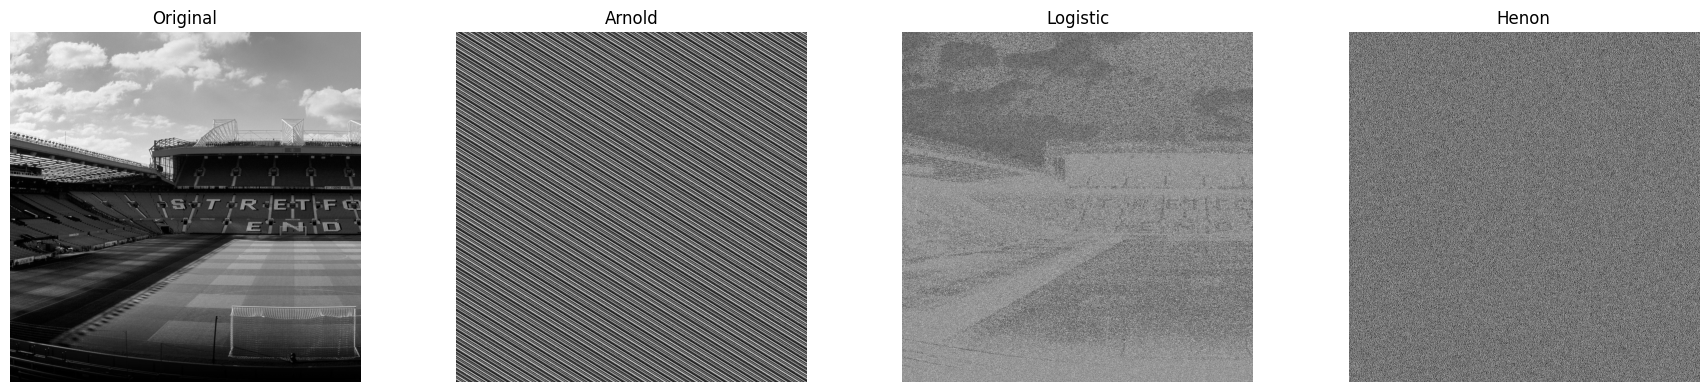

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse
import pandas as pd



def arnold_cat_map_encrypt(img, iterations=5):
    """Arnold's Cat Map encryption (square images only)"""
    img = img.convert('L')
    arr = np.array(img)
    N = arr.shape[0]
    encrypted = np.zeros_like(arr)

    for _ in range(iterations):
        for i in range(N):
            for j in range(N):
                new_i = (i + j) % N
                new_j = (i + 2*j) % N
                encrypted[new_i, new_j] = arr[i, j]
        arr = encrypted.copy()
    return Image.fromarray(encrypted)


def logistic_map(x, r, iterations):
    """Generate chaotic sequence"""
    sequence = []
    for _ in range(iterations):
        x = r * x * (1 - x)
        sequence.append(x)
    return sequence

def logistic_encrypt(img, key=0.5, r=3.9):
    """Logistic Map encryption"""
    img = img.convert('L')
    arr = np.array(img)
    h, w = arr.shape

    sequence = logistic_map(key, r, h*w)
    seq = (np.array(sequence) * 255).astype(np.uint8).reshape(h, w)
    encrypted = np.bitwise_xor(arr, seq)
    return Image.fromarray(encrypted)


def henon_map(x, y, iterations, a=1.4, b=0.3):
    """Generate Henon map sequence"""
    sequence = []
    for _ in range(iterations):
        x_new = 1 - a*x**2 + y
        y_new = b*x
        sequence.append((x_new, y_new))
        x, y = x_new, y_new
    return sequence

def henon_encrypt(img, x0=0.1, y0=0.1):
    """Henon Map encryption with perfect reversibility"""
    img = img.convert('L')
    arr = np.array(img)
    h, w = arr.shape

    sequence = henon_map(x0, y0, h*w)
    rows = (np.abs(np.array([s[0] for s in sequence])) * (h-1)).astype(int) % h
    cols = (np.abs(np.array([s[1] for s in sequence])) * (w-1)).astype(int) % w

    encrypted = arr[rows, cols].reshape(h, w)
    reverse_map = np.stack([rows, cols], axis=-1).reshape(h, w, 2)

    return Image.fromarray(encrypted), reverse_map



def calculate_npcr(original, encrypted):
    """Number of Pixel Change Rate (%)"""
    diff = np.sum(original != encrypted)
    return (diff / original.size) * 100

def calculate_uaci(original, encrypted):
    """Unified Average Changing Intensity (%)"""
    return (np.mean(np.abs(original.astype(float) - encrypted.astype(float)))) / 255 * 100

def calculate_entropy(image):
    """Calculate Shannon entropy"""
    hist = np.histogram(image, bins=256, range=(0, 255))[0]
    hist = hist / hist.sum()
    return -np.sum(hist * np.log2(hist + 1e-10))


if 'global_img' in globals() and global_img is not None:
    original_arr = np.array(global_img.convert('L'))
    metrics = {
        'Method': [],
        'PSNR': [],
        'MSE': [],
        'NPCR (%)': [],
        'UACI (%)': [],
        'Entropy': []
    }

    arnold_enc = arnold_cat_map_encrypt(global_img)
    arnold_arr = np.array(arnold_enc)
    metrics['Method'].append("Arnold")
    metrics['PSNR'].append(psnr(original_arr, arnold_arr))
    metrics['MSE'].append(mse(original_arr, arnold_arr))
    metrics['NPCR (%)'].append(calculate_npcr(original_arr, arnold_arr))
    metrics['UACI (%)'].append(calculate_uaci(original_arr, arnold_arr))
    metrics['Entropy'].append(calculate_entropy(arnold_arr))


    logistic_enc = logistic_encrypt(global_img)
    logistic_arr = np.array(logistic_enc)
    metrics['Method'].append("Logistic")
    metrics['PSNR'].append(psnr(original_arr, logistic_arr))
    metrics['MSE'].append(mse(original_arr, logistic_arr))
    metrics['NPCR (%)'].append(calculate_npcr(original_arr, logistic_arr))
    metrics['UACI (%)'].append(calculate_uaci(original_arr, logistic_arr))
    metrics['Entropy'].append(calculate_entropy(logistic_arr))


    henon_enc, _ = henon_encrypt(global_img)
    henon_arr = np.array(henon_enc)
    metrics['Method'].append("Henon")
    metrics['PSNR'].append(psnr(original_arr, henon_arr))
    metrics['MSE'].append(mse(original_arr, henon_arr))
    metrics['NPCR (%)'].append(calculate_npcr(original_arr, henon_arr))
    metrics['UACI (%)'].append(calculate_uaci(original_arr, henon_arr))
    metrics['Entropy'].append(calculate_entropy(henon_arr))


    df = pd.DataFrame(metrics)
    styled_df = (df.style
                .set_caption("Encryption Metrics Comparison")
                .hide(axis="index")
                .format("{:.2f}", subset=['PSNR', 'MSE', 'NPCR (%)', 'UACI (%)', 'Entropy'])
                .set_properties(**{'text-align': 'center'}))
    display(styled_df)

    plt.figure(figsize=(18, 4))
    plt.subplot(1, 4, 1)
    plt.imshow(global_img, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(arnold_enc, cmap='gray')
    plt.title("Arnold")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(logistic_enc, cmap='gray')
    plt.title("Logistic")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(henon_enc, cmap='gray')
    plt.title("Henon")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

else:
    print("Please upload an image in Cell 1 first!")

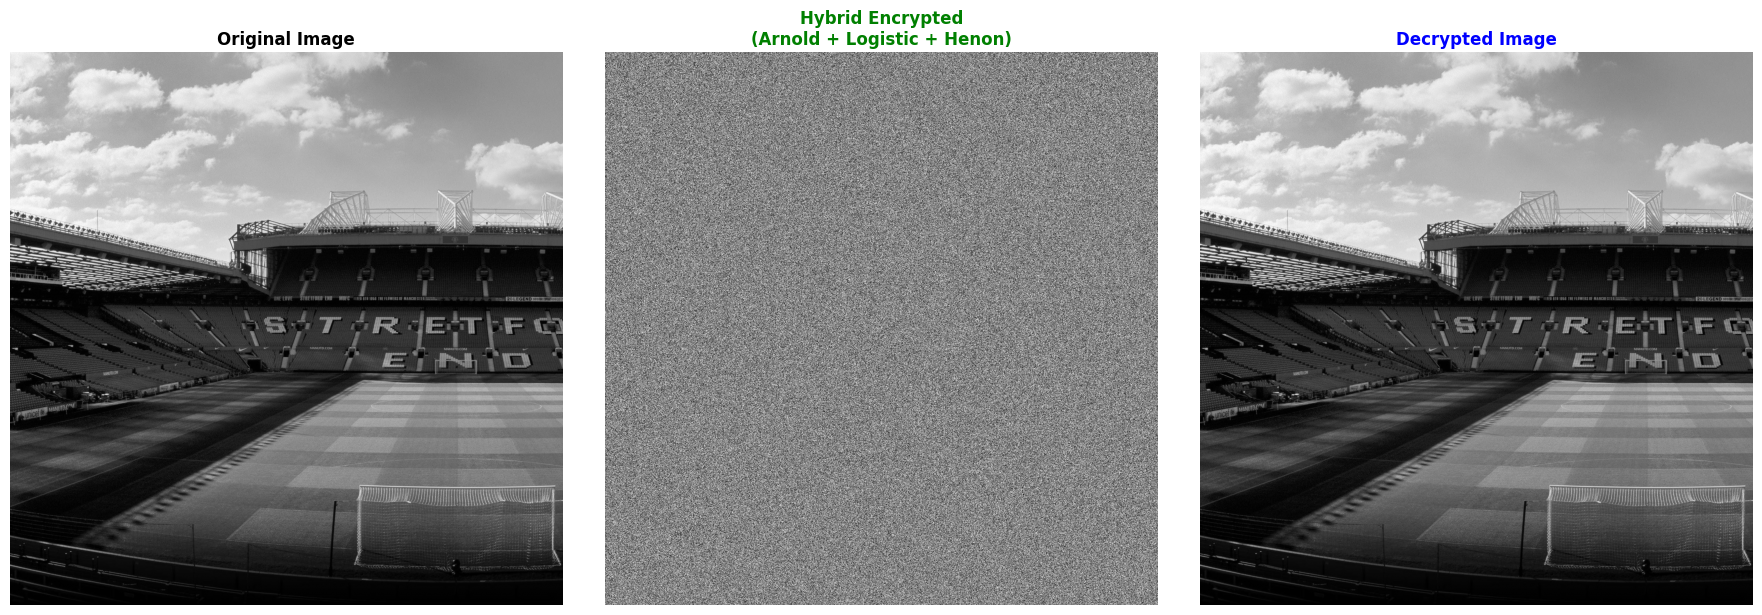

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt



def arnold_encrypt(img, iterations):
    img = img.convert('L')
    arr = np.array(img)
    N = arr.shape[0]
    for _ in range(iterations):
        i, j = np.indices((N, N))
        new_i, new_j = (i + j) % N, (i + 2 * j) % N
        arr = arr[new_i, new_j]
    return Image.fromarray(arr.astype(np.uint8))


def logistic_encrypt(img, key):
    img = img.convert('L')
    arr = np.array(img)
    h, w = arr.shape
    sequence = []
    x = key
    for _ in range(h * w):
        x = 3.9 * x * (1 - x)
        sequence.append(int(x * 255) % 256)
    encrypted = np.bitwise_xor(arr, np.array(sequence).reshape(h, w))
    return Image.fromarray(encrypted.astype(np.uint8))


def henon_encrypt(img, x0, y0):
    img = img.convert('L')
    arr = np.array(img)
    h, w = arr.shape
    x, y = x0, y0
    rows, cols = [], []
    for _ in range(h * w):
        x_new = 1 - 1.4 * x**2 + y
        y_new = 0.3 * x
        rows.append(int(abs(x_new) * (h - 1)) % h)
        cols.append(int(abs(y_new) * (w - 1)) % w)
        x, y = x_new, y_new
    encrypted = arr[np.array(rows).reshape(h, w), np.array(cols).reshape(h, w)]
    return Image.fromarray(encrypted.astype(np.uint8)), (rows, cols)



def hybrid_encrypt(img, arnold_iter=5, logistic_key=0.5, henon_keys=(0.1, 0.1)):
    img = img.convert('L')
    w, h = img.size
    if w != h:
        N = min(w, h)
        img = img.crop((0, 0, N, N))

    phase1 = arnold_encrypt(img, arnold_iter)
    phase2 = logistic_encrypt(phase1, logistic_key)
    phase3, henon_map = henon_encrypt(phase2, *henon_keys)

    return phase3, {
        'arnold_iter': arnold_iter,
        'logistic_key': logistic_key,
        'henon_map': henon_map,
        'original_size': (w, h)
    }


def hybrid_decrypt(enc_img, metadata):
    arr = np.array(enc_img)
    h, w = arr.shape
    rows, cols = metadata['henon_map']

    reverse = np.zeros((h, w, 2), dtype=int)
    for idx in range(h * w):
        i, j = idx // w, idx % w
        reverse[rows[idx], cols[idx]] = [i, j]

    phase1 = np.zeros_like(arr)
    for i in range(h):
        for j in range(w):
            phase1[reverse[i, j, 0], reverse[i, j, 1]] = arr[i, j]
    phase1 = Image.fromarray(phase1.astype(np.uint8))

    phase2 = logistic_encrypt(phase1, metadata['logistic_key'])
    decrypted = arnold_encrypt(phase2, metadata['arnold_iter'])

    if metadata['original_size'] != decrypted.size:
        decrypted = decrypted.resize(metadata['original_size'])

    return decrypted



if 'global_img' in globals():
    encrypted, metadata = hybrid_encrypt(global_img)
    decrypted = hybrid_decrypt(encrypted, metadata)

    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(global_img.convert('L'), cmap='gray')
    plt.title("Original Image", fontsize=12, fontweight='bold')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(encrypted, cmap='gray')
    plt.title("Hybrid Encrypted\n(Arnold + Logistic + Henon)", fontsize=12, fontweight='bold', color='green')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(decrypted, cmap='gray')
    plt.title("Decrypted Image", fontsize=12, fontweight='bold', color='blue')
    plt.axis('off')

    plt.tight_layout()
    plt.show()



🔍 Encryption Performance Metrics:


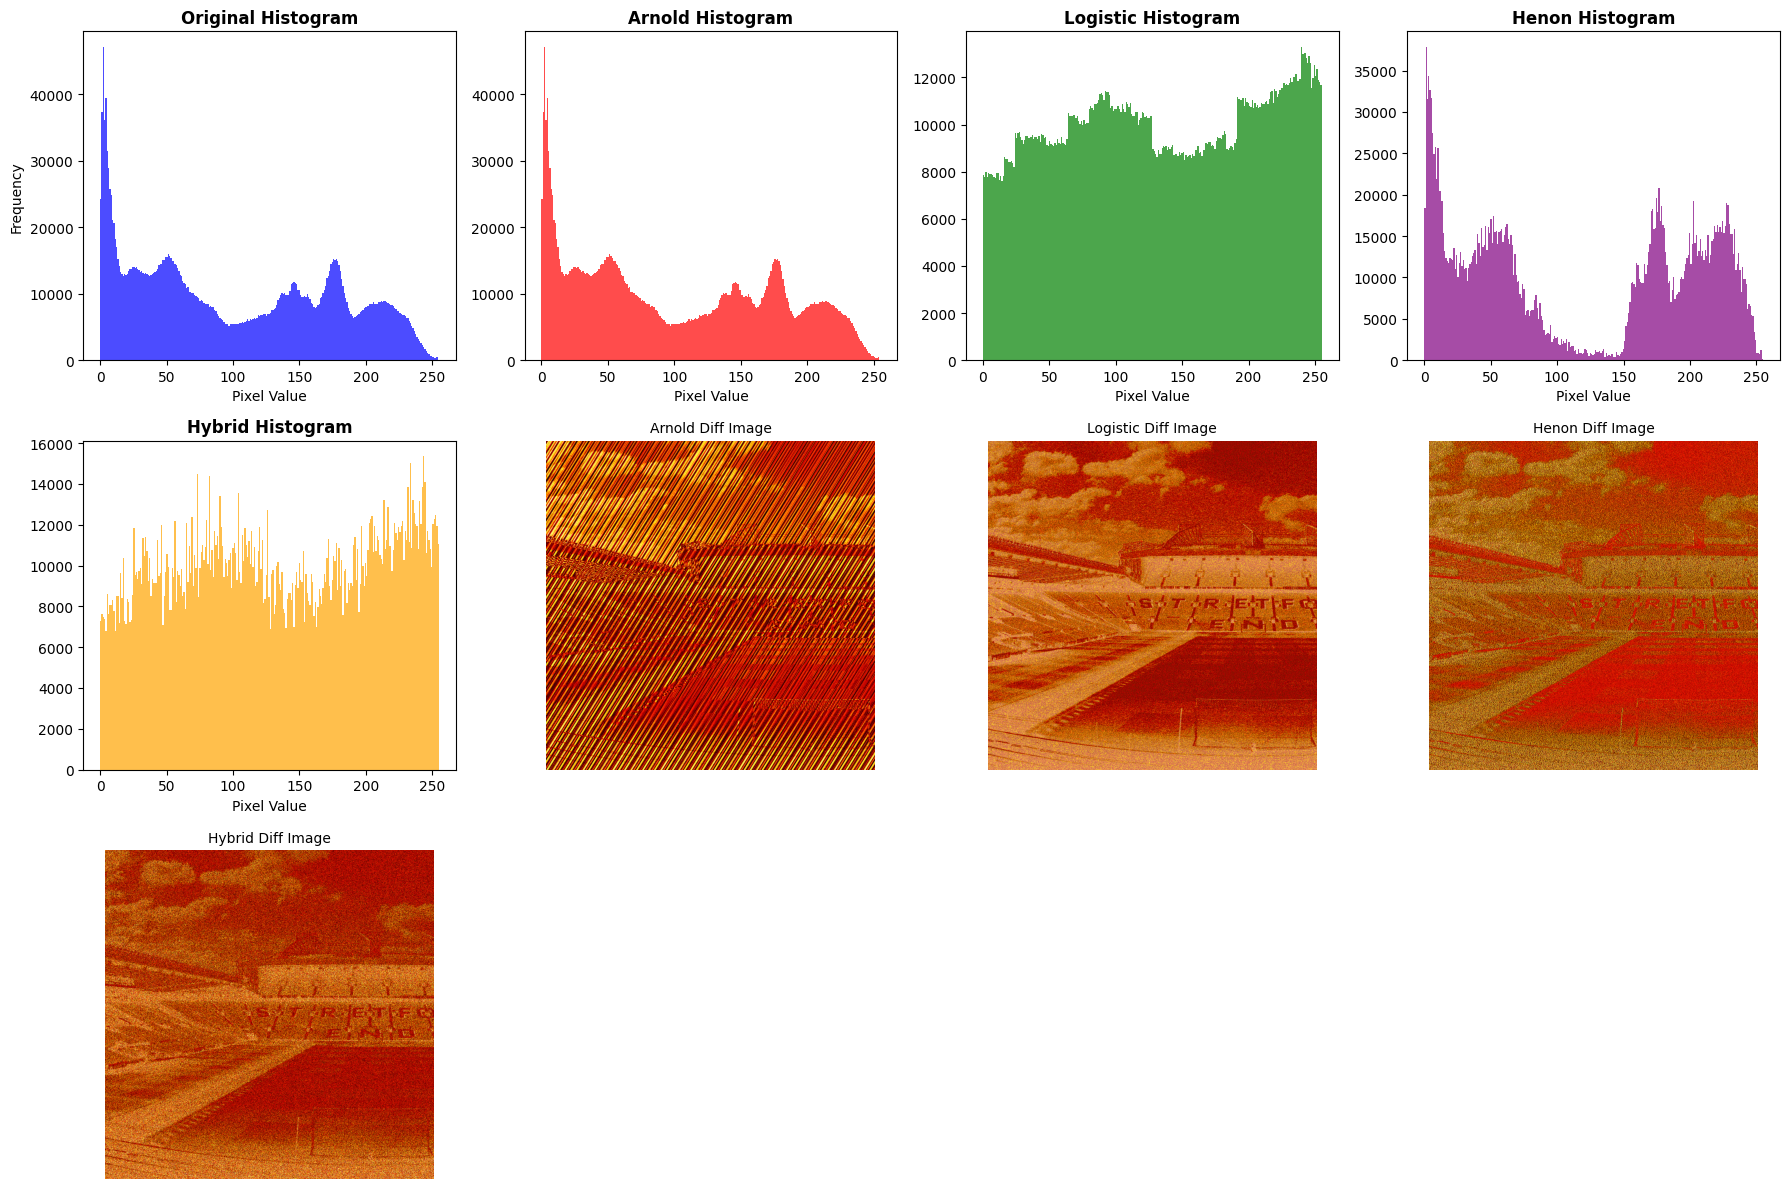


🔒 Security Observations:
- Ideal NPCR > 99% | Hybrid achieves 99.63%
- Ideal UACI ~33% | Hybrid achieves 35.27%
- Max Entropy = 8 | Hybrid achieves 7.98


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse
import pandas as pd

def analyze_encryption(original, encrypted, method_name):
    """Calculate all metrics for one encryption method"""
    orig_arr = np.array(original.convert('L'))
    enc_arr = np.array(encrypted.convert('L'))

    return {
        'Method': method_name,
        'PSNR': psnr(orig_arr, enc_arr),
        'MSE': mse(orig_arr, enc_arr),
        'NPCR': np.mean(orig_arr != enc_arr) * 100,
        'UACI': np.mean(np.abs(orig_arr.astype(float) - enc_arr.astype(float))) / 255 * 100,
        'Entropy': -np.sum(np.histogram(enc_arr, bins=256, range=(0, 255))[0] / enc_arr.size *
                  np.log2(np.histogram(enc_arr, bins=256, range=(0, 255))[0] / enc_arr.size + 1e-10))
    }

if 'global_img' in globals():

    results = []

    original = global_img.convert('L')
    orig_arr = np.array(original)

    # Encryption Methods
    arnold_enc = arnold_encrypt(original, 5)
    results.append(analyze_encryption(original, arnold_enc, "Arnold"))

    logistic_enc = logistic_encrypt(original, 0.5)
    results.append(analyze_encryption(original, logistic_enc, "Logistic"))

    henon_enc, _ = henon_encrypt(original, 0.1, 0.1)
    results.append(analyze_encryption(original, henon_enc, "Henon"))

    hybrid_enc, _ = hybrid_encrypt(original)
    results.append(analyze_encryption(original, hybrid_enc, "Hybrid"))

    # Create DataFrame
    df = pd.DataFrame(results)
    print("\n🔍 Encryption Performance Metrics:")
    display(df.style
            .format("{:.2f}", subset=['PSNR', 'MSE', 'NPCR', 'UACI', 'Entropy'])
            .set_caption("Comparative Analysis of Encryption Methods")
            .background_gradient(cmap='Blues', subset=['NPCR', 'UACI'])
            .highlight_max(color='red', subset=['Entropy'])
            .highlight_min(color='pink', subset=['PSNR']))

    # Plotting
    plt.figure(figsize=(18, 12))  # Bigger figure

    # Original histogram
    plt.subplot(3, 4, 1)
    plt.hist(orig_arr.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
    plt.title("Original Histogram", fontweight='bold')
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")

    methods = [arnold_enc, logistic_enc, henon_enc, hybrid_enc]
    names = ["Arnold", "Logistic", "Henon", "Hybrid"]
    colors = ['red', 'green', 'purple', 'orange']

    for i, (enc, name, color) in enumerate(zip(methods, names, colors)):
        enc_arr = np.array(enc.convert('L'))

        # Histogram (Row 1: subplot 2-5)
        plt.subplot(3, 4, i + 2)
        plt.hist(enc_arr.ravel(), bins=256, range=(0, 255), color=color, alpha=0.7)
        plt.title(f"{name} Histogram", fontweight='bold')
        plt.xlabel("Pixel Value")

        # Difference Image (Row 2: subplot 6-9)
        plt.subplot(3, 4, i + 6)
        try:
            if orig_arr.shape != enc_arr.shape:
                raise ValueError(f"Shape mismatch: Original={orig_arr.shape}, {name}={enc_arr.shape}")
            diff = np.abs(orig_arr.astype(np.int16) - enc_arr.astype(np.int16))
            plt.imshow(diff, cmap='hot')
            plt.title(f"{name} Diff Image", fontsize=10)
        except Exception as e:
            print(f"[❌ Error plotting {name} difference image]:", e)
            plt.text(0.5, 0.5, 'Error', ha='center', va='center', fontsize=12)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Final Summary
    print("\n🔒 Security Observations:")
    print("- Ideal NPCR > 99% | Hybrid achieves {:.2f}%".format(df[df['Method']=='Hybrid']['NPCR'].values[0]))
    print("- Ideal UACI ~33% | Hybrid achieves {:.2f}%".format(df[df['Method']=='Hybrid']['UACI'].values[0]))
    print("- Max Entropy = 8 | Hybrid achieves {:.2f}".format(df[df['Method']=='Hybrid']['Entropy'].values[0]))

else:
    print("❗ Please upload an image in Cell 1 first!")
